In [9]:
import json # lưu và xuất file json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import requests 
import json
import csv
from datetime import datetime
from pandas import json_normalize
from pprint import pprint

import plotly.express as px
import plotly as py
import matplotlib.colors as mc # For the legend
import plotly.graph_objs as go

### So sánh cases và deaths của 6 châu lục trong 2 năm

continents_history_data được khởi tạo để lưu dữ liệu lịch sử của 6 châu lục, trong đó bao gồm 3 trường: cases, deaths và recovered, trong mỗi trường có dữ liệu của tất cả ngày (từ ngày API được tạo ra đến thời điểm nhập dữ liệu gần nhất - tức là ngày 16/03/2022)

Đọc dữ liệu API cần được sử dụng

In [197]:
f = open('continents_history_api.json')
continents_history_data = json.load(f)
f.close()

Chuẩn bị dữ liệu để thuận tiện truy xuất dữ liệu

In [75]:
# lưu trữ các châu lục
continents = list(continents_history_data.keys())
# lưu trữ tất cả các ngày có trong continents_history_data
days = list(continents_history_data['North America']['cases'].keys())
# lưu trữ các ngày cần thiết để phục vụ mục đích trực quan
wanted_days = [days[i] for i in range(0,len(days),60)]

Trực quan hoá

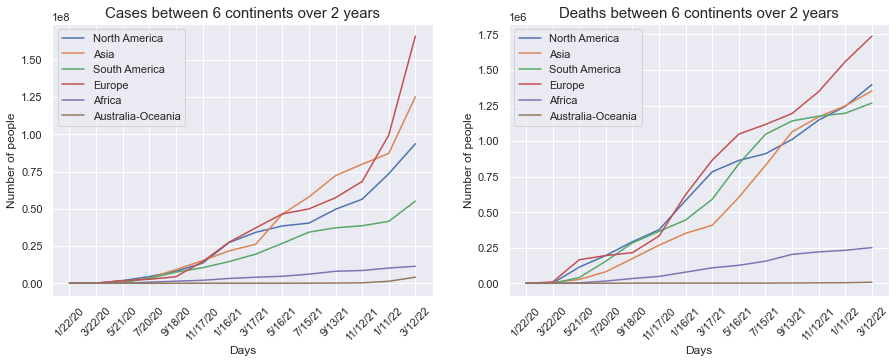

In [186]:
fig, (ax1,ax2) = plt.subplots(figsize=(15,5),nrows=1,ncols=2)

# lineplot các châu lục cho 2 trường dữ liệu: cases và deaths
# cases
for continent in continents:
    series = [continents_history_data[continent]['cases'][day] for day in wanted_days]
    sns.lineplot(x=wanted_days,y=series,label=continent,ax=ax1)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_xlabel('Days')
ax1.set_ylabel('Number of people')
ax1.set_title(f'Cases between 6 continents over 2 years', fontsize=15)

# deaths
for continent in continents:
    series = [continents_history_data[continent]['deaths'][day] for day in wanted_days]
    sns.lineplot(x=wanted_days,y=series,label=continent,ax=ax2)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_xlabel('Days')
ax2.set_ylabel('Number of people')
ax2.set_title(f'Deaths between 6 continents over 2 years', fontsize=15)

plt.show()

### So sánh casesPerOneMillion, deathsPerOneMillion, recoveredPerOneMillion, activePerOneMillion, criticalPerOneMillion và testsPerOneMillion của tất quả quốc gia ngày hôm nay

countries_df được khởi tạo để lưu dữ liệu của tất cả quốc gia trên thế giới, trong đó bao gồm các trường:
- updated: mã id của cập nhật mới nhất của quốc gia đó
- country: tên quốc gia
- countryInfo: thông tin quốc gia
- cases: tổng số ca nhiễm Covid 19 được phát hiện tính tới ngày thu thập
- todayCases: số ca nhiễm mới được ghi nhận trong ngày
- deaths: tổng số ca tử vong tính tới ngày thu thập
- todayDeaths: số ca tử vong được ghi nhận trong ngày
- recovered: tổng số ca hồi phục được phát hiện tính tới ngày thu thập
- todayRecovered: số ca hồi phục được ghi nhận trong ngày
- active: số ca nhiễm đang được điều trị
- critical: số ca nhiễm nặng hoặc nghiêm trọng
- casesPerOneMillion: tỉ lệ người nhiễm Covid 19 so với dân số quốc gia
- deathsPerOneMillion: tỉ lệ người tử vong so với dân số quốc gia
- tests: tổng số ca nghi nhiễm Covid 19 được phát hiện tính tới ngày thu thập
- testsPerOneMillion: tỉ lệ người nghi nhiễm Covid 19 so với dân số quốc gia
- population: dân số của quốc gia
- continent: châu lục 
- oneCasePerPeople: tổng số lượng người trong đó có 1 ca nhiễm Covid 19
- oneDeathPerPeople: tổng số lượng người trong đó có 1 ca tử vong
- oneTestPerPeople: tổng số lượng người trong đó có 1 ca nghi nhiễm
- activePerOneMillion: tỉ lệ người đang được điều trị so với dân số quốc gia
- recoveredPerOneMillion: tỉ lệ người hồi phục so với dân số quốc gia
- criticalPerOneMillion: tỉ lệ người nhiễm Covid 19 nặng hoặc nghiêm trọng so với dân số quốc gia

Đọc dữ liệu API cần được sử dụng

In [175]:
f = open('countries_api.json')
countries_df = pd.DataFrame(json.load(f))
f.close()
countries_df.head()

,updated,country,countryInfo,cases,todayCases,deaths,todayDeaths,recovered,todayRecovered,active,...,tests,testsPerOneMillion,population,continent,oneCasePerPeople,oneDeathPerPeople,oneTestPerPeople,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion
0,1647698167469,Afghanistan,"{'_id': 4, 'iso2': 'AF', 'iso3': 'AFG', 'lat':...",177039,30,7652,1,159797,53,9590,...,910735,22530,40423766,Asia,228,5283,44,237.24,3953.05,27.81
1,1647698167459,Albania,"{'_id': 8, 'iso2': 'AL', 'iso3': 'ALB', 'lat':...",272961,0,3487,0,268835,0,639,...,1765898,614774,2872433,Europe,11,824,2,222.46,93591.39,4.53
2,1647698167459,Algeria,"{'_id': 12, 'iso2': 'DZ', 'iso3': 'DZA', 'lat'...",265524,0,6871,0,178156,0,80497,...,230861,5107,45202038,Africa,170,6579,196,1780.83,3941.33,0.13
3,1647698167662,Andorra,"{'_id': 20, 'iso2': 'AD', 'iso3': 'AND', 'lat'...",39234,0,153,0,38377,0,704,...,249838,3224715,77476,Europe,2,506,0,9086.68,495340.49,180.70
4,1647698167559,Angola,"{'_id': 24, 'iso2': 'AO', 'iso3': 'AGO', 'lat'...",99003,0,1900,0,96951,0,152,...,1473371,42572,34609309,Africa,350,18215,23,4.39,2801.30,0.00


Trực quan hoá

<AxesSubplot:ylabel='testsPerOneMillion'>

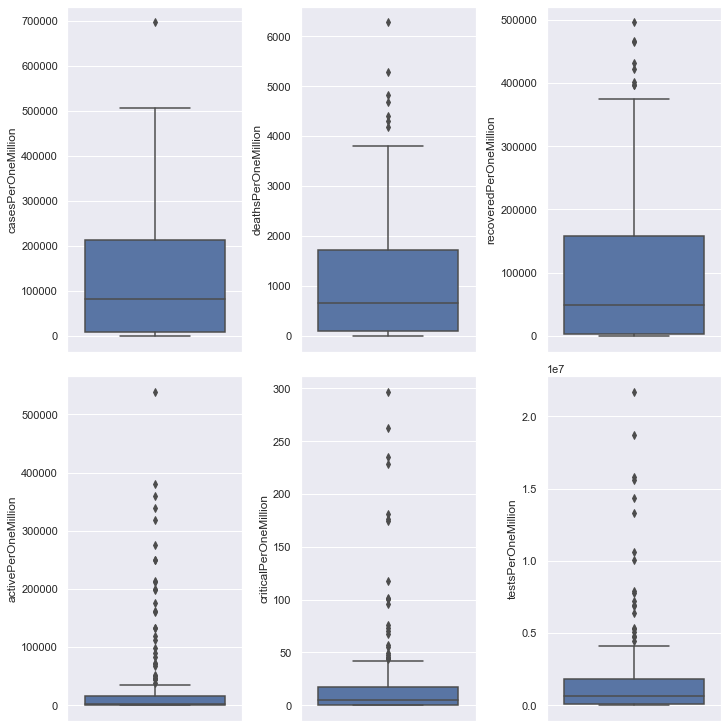

In [210]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(figsize=(10,10),nrows=2,ncols=3,constrained_layout=True)
sns.boxplot(y=countries_df['casesPerOneMillion'],ax=ax1)
sns.boxplot(y=countries_df['deathsPerOneMillion'],ax=ax2)
sns.boxplot(y=countries_df['recoveredPerOneMillion'],ax=ax3)
sns.boxplot(y=countries_df['activePerOneMillion'],ax=ax4)
sns.boxplot(y=countries_df['criticalPerOneMillion'],ax=ax5)
sns.boxplot(y=countries_df['testsPerOneMillion'],ax=ax6)

### So sánh deathsPerOneMillion và recoveredPerOneMillion của tất quả quốc gia ngày hôm nay

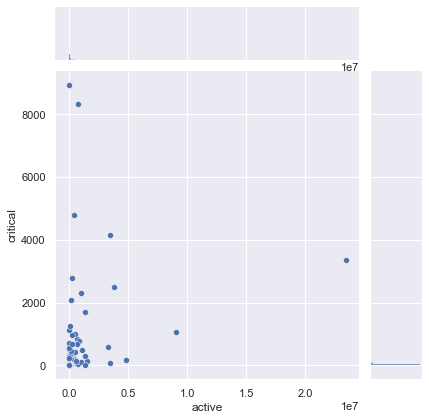

In [200]:
sns.jointplot(x='active',y='critical',data=countries_df)

### Tổng số ca nhiễm / số ca tử vong / số lượt xét nghiệm của các quốc gia thuộc 6 châu lục tính đến ngày 19/03/2022

In [7]:
with open('countries_api.json') as f:
    data = json.load(f)

df = json_normalize(data)
df.to_csv('api/raw/countries.csv', index=False)

world = pd.read_csv('api/raw/countries.csv', usecols = ['country','cases','deaths','recovered','tests','critical','active'])
countries = world['country'].values
cases_today = world['cases'].values
deaths_today = world['deaths'].values
tests_today = world['tests'].values

dict_data = dict(zip(countries, cases_today))
path = open("api/modified/today_cases.csv", "w")
writer = csv.writer(path)
writer.writerow(['country','cases'])
for key,value in dict_data.items():
    writer.writerow([key,value])
path.close()

dict_data = dict(zip(countries, deaths_today))
path = open("api/modified/today_deaths.csv", "w")
writer = csv.writer(path)
writer.writerow(['country','deaths'])
for key,value in dict_data1.items():
    writer.writerow([key,value])
path.close()

dict_data = dict(zip(countries, tests_today))
path = open("api/modified/today_tests.csv", "w")
writer = csv.writer(path)
writer.writerow(['country','tests'])
for key,value in dict_data2.items():
    writer.writerow([key,value])
path.close()

#### Ca nhiễm

In [13]:
df_data = pd.read_csv('api/modified/today_cases.csv')            
data = dict (
    type = 'choropleth',
    locations = df_data['country'],
    locationmode='country names',
    colorscale = 'portland',
    z=df_data['cases'])

layout = go.Layout(title='Bản đồ thể hiện tổng số ca nhiễm của các quốc gia thuộc 6 châu lục tính đến ngày 19/03/2022 (đơn vị: ca)',
                   hovermode='closest',xaxis=dict(title='src freq', type='log', autorange=True),
                   yaxis=dict(title='trg freq', type='log', autorange=True))
map = go.Figure(data=[data], layout=layout)
py.offline.plot(map)

'temp-plot.html'

#### Ca tử vong

In [15]:
df_data = pd.read_csv('api/modified/today_deaths.csv')            
data = dict (
    type = 'choropleth',
    locations = df_data['country'],
    locationmode='country names',
    colorscale = 'portland',
    z=df_data['deaths'])

layout = go.Layout(title='Bản đồ thể hiện tổng số ca tử vong của các quốc gia thuộc 6 châu lục tính đến ngày 19/03/2022 (đơn vị: ca)',
                   hovermode='closest',xaxis=dict(title='src freq', type='log', autorange=True),
                   yaxis=dict(title='trg freq', type='log', autorange=True))
map = go.Figure(data=[data], layout=layout)
py.offline.plot(map)

'temp-plot.html'

#### Lượt xét nghiệm

In [17]:
df_data = pd.read_csv('api/modified/today_tests.csv')            
data = dict (
    type = 'choropleth',
    locations = df_data['country'],
    locationmode='country names',
    colorscale = 'portland',
    z=df_data['tests'])

layout = go.Layout(title='Bản đồ thể hiện tổng số lượt xét nghiệm của các quốc gia thuộc 6 châu lục tính đến ngày 19/03/2022 (đơn vị: ca)',
                   hovermode='closest',xaxis=dict(title='src freq', type='log', autorange=True),
                   yaxis=dict(title='trg freq', type='log', autorange=True))
map = go.Figure(data=[data], layout=layout)
py.offline.plot(map)

'temp-plot.html'

In [19]:
url = 'https://disease.sh/v3/covid-19/continents/asia?yesterday=true'
payload = {}
headers = {}
response = requests.request("GET", url, headers=headers, data=payload)

with open('api/continents.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(response.text))

with open('api/continents.json') as file_object:
    data = json.load(file_object)

d = json.loads(data)
with open('api/continents.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(d))

with open('api/continents.json') as f:
    data = json.load(f)
    
df = json_normalize(data)
df.to_csv('api/raw/asia_yesterday.csv', index=False)

In [20]:
url = 'https://disease.sh/v3/covid-19/continents/africa?yesterday=true'
payload = {}
headers = {}
response = requests.request("GET", url, headers=headers, data=payload)

with open('api/continents.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(response.text))

with open('api/continents.json') as file_object:
    data = json.load(file_object)

d = json.loads(data)
with open('api/continents.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(d))

with open('api/continents.json') as f:
    data = json.load(f)
    
df = json_normalize(data)
df.to_csv('api/raw/africa_yesterday.csv', index=False)

In [21]:
url = 'https://disease.sh/v3/covid-19/continents/europe?yesterday=true'
payload = {}
headers = {}
response = requests.request("GET", url, headers=headers, data=payload)

with open('api/continents.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(response.text))

with open('api/continents.json') as file_object:
    data = json.load(file_object)

d = json.loads(data)
with open('api/continents.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(d))

with open('api/continents.json') as f:
    data = json.load(f)
    
df = json_normalize(data)
df.to_csv('api/raw/europe_yesterday.csv', index=False)

In [22]:
url = 'https://disease.sh/v3/covid-19/continents/north%20america?yesterday=true'
payload = {}
headers = {}
response = requests.request("GET", url, headers=headers, data=payload)

with open('api/continents.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(response.text))

with open('api/continents.json') as file_object:
    data = json.load(file_object)

d = json.loads(data)
with open('api/continents.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(d))

with open('api/continents.json') as f:
    data = json.load(f)
    
df = json_normalize(data)
df.to_csv('api/raw/na_yesterday.csv', index=False)

In [23]:
url = 'https://disease.sh/v3/covid-19/continents/south%20america?yesterday=true'
payload = {}
headers = {}
response = requests.request("GET", url, headers=headers, data=payload)

with open('api/continents.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(response.text))

with open('api/continents.json') as file_object:
    data = json.load(file_object)

d = json.loads(data)
with open('api/continents.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(d))

with open('api/continents.json') as f:
    data = json.load(f)
    
df = json_normalize(data)
df.to_csv('api/raw/sa_yesterday.csv', index=False)

In [24]:
url = 'https://disease.sh/v3/covid-19/continents/oceania?yesterday=true'
payload = {}
headers = {}
response = requests.request("GET", url, headers=headers, data=payload)

with open('api/continents.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(response.text))

with open('api/continents.json') as file_object:
    data = json.load(file_object)

d = json.loads(data)
with open('api/continents.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(d))

with open('api/continents.json') as f:
    data = json.load(f)
    
df = json_normalize(data)
df.to_csv('api/raw/oceania_yesterday.csv', index=False)

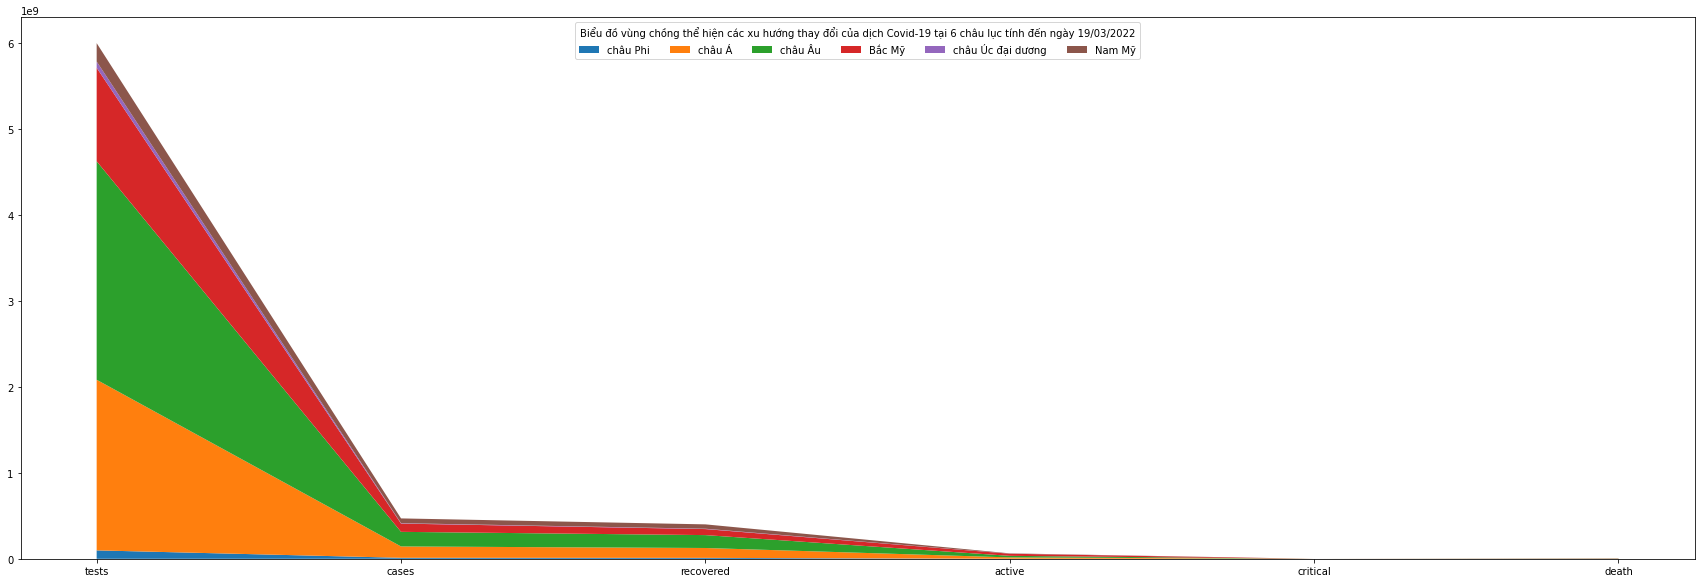

In [25]:
africa = pd.read_csv('api/raw/africa_yesterday.csv')
asia = pd.read_csv('api/raw/asia_yesterday.csv')
europe = pd.read_csv('api/raw/europe_yesterday.csv')
na = pd.read_csv('api/raw/na_yesterday.csv')
oceania = pd.read_csv('api/raw/oceania_yesterday.csv')
sa = pd.read_csv('api/raw/sa_yesterday.csv')


x=['tests','cases','recovered','active','critical','death']
y1=[africa['tests'][0],africa['cases'][0],africa['recovered'][0],africa['active'][0],africa['critical'][0],africa['deaths'][0]]
y2=[asia['tests'][0],asia['cases'][0],asia['recovered'][0],asia['active'][0],asia['critical'][0],asia['deaths'][0]]
y3=[europe['tests'][0],europe['cases'][0],europe['recovered'][0],europe['active'][0],europe['critical'][0],europe['deaths'][0]]
y4=[na['tests'][0],na['cases'][0],na['recovered'][0],na['active'][0],na['critical'][0],na['deaths'][0]]
y5=[oceania['tests'][0],oceania['cases'][0],oceania['recovered'][0],oceania['active'][0],oceania['critical'][0],oceania['deaths'][0]]
y6=[sa['tests'][0],sa['cases'][0],sa['recovered'][0],sa['active'][0],sa['critical'][0],sa['deaths'][0]]

fig = plt.figure()
plt.stackplot(x,y1, y2, y3, y4, y5, y6, labels=['châu Phi', 'châu Á', 'châu Âu', 'Bắc Mỹ', 'châu Úc đại dương', 'Nam Mỹ'])
plt.legend(loc='upper center',ncol = 6,title='Biểu đồ vùng chồng thể hiện các xu hướng thay đổi của dịch Covid-19 tại 6 châu lục tính đến ngày 19/03/2022')
fig.subplots_adjust(right=4.000,bottom=-1.000)
